In [1]:
import pandas
import matplotlib.pyplot as pyplot
from ipywidgets import widgets
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")

from magicme import magic

The Ingedients
============


**Availability of Crude Oil:**

<AxesSubplot:xlabel='Month', ylabel='Thousand of barrels'>

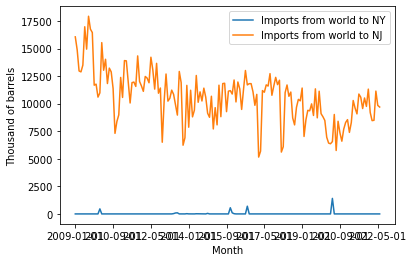

In [2]:
imports_ny = pandas.read_csv("imp_ny.csv",dtype={"Date":"str"})
imports_nj = pandas.read_csv("imp_nj.csv",dtype={"Date":"str"})
imports_ny.sort_values(by="Date",inplace=True)
imports_nj.sort_values(by="Date",inplace=True)
production_ny = pandas.read_csv("pro_ny.csv",dtype={"Date":"str"})
ax = imports_ny.plot(x="Date",y="Barrels",ylabel="Thousand of barrels",xlabel="Month",label="Imports from world to NY")
imports_nj.plot(x="Date",y="Barrels",ylabel="Thousand of barrels",xlabel="Month",label="Imports from world to NJ",ax=ax)

<AxesSubplot:xlabel='Month', ylabel='Thousand of barrels'>

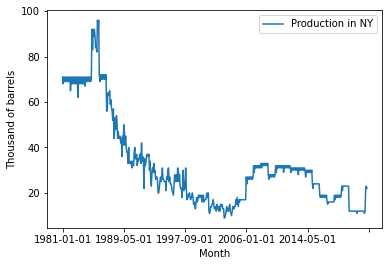

In [3]:
production_ny.sort_values(by="Date",inplace=True)
production_ny.plot(x="Date",y="Barrels",ylabel="Thousand of barrels",xlabel="Month",label="Production in NY")

**Weather:**

<AxesSubplot:xlabel='Week'>

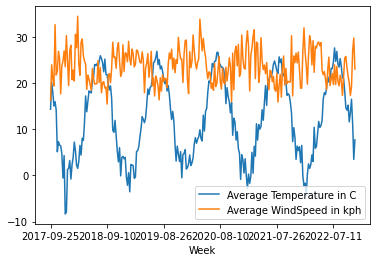

In [4]:
weather = pandas.read_csv("temp_ny_2.csv")
ax = weather.plot(x='datetime',y='temp',label="Average Temperature in C")
weather.plot(x='datetime',y='windspeed',ax=ax,xlabel="Week",label="Average WindSpeed in kph")

**Price of Heating Oil**

<AxesSubplot:xlabel='Weeks', ylabel='Dollars per Gallon'>

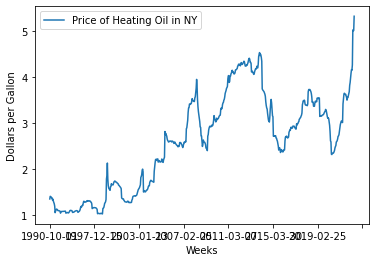

In [5]:
dpg_ny = pandas.read_csv("price_ny.csv",dtype={"Date":"str"})
dpg_ny.sort_values(by="Date",inplace=True)
dpg_ny.plot(x='Date',y='DPG',xlabel='Weeks',ylabel='Dollars per Gallon',label='Price of Heating Oil in NY')

HOP Prediction
=====

In [6]:
manager = magic()

@interact( year = [2017,2018,2019,2020,2021], train_weeks=widgets.IntSlider(min=5, max=25, step=1, value=25) )
def plotModel(year,train_weeks):
    manager.selectYear( year )
    manager.trainModel( train_weeks )
    df = manager.getDB()
    ax = df.plot(x='Date',y='Predicted1',color='magenta',label="LinearRegress")
    df.plot(x='Date',y='Predicted2',color='green',ax=ax,label="Lasso")
    df.plot(x='Date',y='Predicted3',color='cyan',ax=ax,label="DecisionTree")
    df.plot(x='Date',y='DPG',kind='scatter',color='gray',ax=ax,label="Future Values")
    df.plot(x='Date',y='Trained',kind='scatter',color='r',ax=ax,label="Past Values",ylabel="Dollars Per Gallon")

interactive(children=(Dropdown(description='year', options=(2017, 2018, 2019, 2020, 2021), value=2017), IntSli…